Question 3 : Write a program that can perform a letter frequency attack on an additive cipher without human intervention. Your software should produce possible plain text in rough order of likelihood. It would be good if your user interface allows user to specify " Give me top 10 possible plain texts".

Relative frequency distribution of letters in an english text.

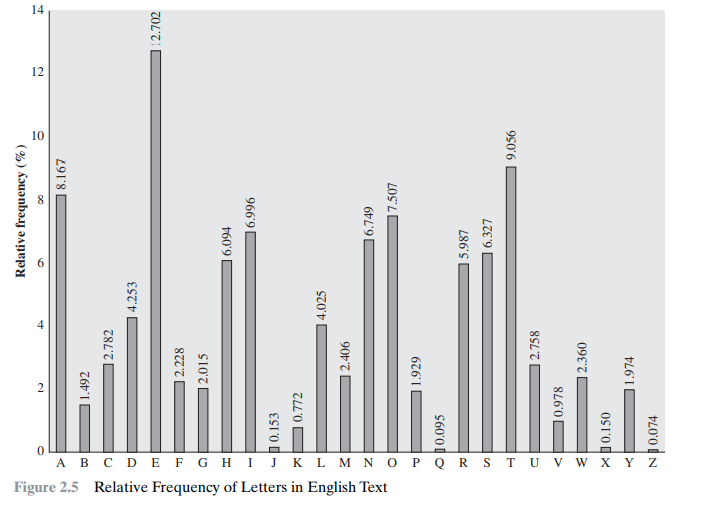

Cracking Additive cipher

Frequency analysis cracking
  1. Calculate the relative ferequency distribution of the ciphertext's letters
  2. get the most frequent letter in the ciphertext 
  3. we get the key based on a simple formula

    key=value of ciphertext's most frequent letter -value of E

As additive cipher shifts all letters with the same key doesnot alter distribuation

In [3]:
#A python program to crack additive cipher encryption


LETTERS=' ABCDEFGHIJKLMNOPQRSTUVWXYZ' #These are the english letters along with space whose frequency will be stored
freq_dist_of_eng='ETAOINSRHD'  #These are the most frequent characters used in english alphabet top 10

#We will compare most used character of the encrypted text with most used character of english
# and find key by:-   key=value of ciphertext's most frequent letter -value of most frequent words of english

#Defining a function named decrpt that would take text to be decrypted and shift integer(number of positions a letter was sifted down by encrypt) as input 
def decrypt(msg,s):
    """
    Input:
      msg: This is the msg to be decrypted.
      s: This is the number of positions a letter is shifted while encryption
    Output:
      The decrypted text corresponding to the inputs given.
    Eg:
      Msg  : BUUBDL
      S : 1
      Encrypted text: ATTACK
    """
    s=26-s  #the cyclic property of the cipher under modulo 26 
    result = "" #this will store the result 
 
    # traverse msg letter by letter
    for i in range(len(msg)):
        char = msg[i]
 
        # Encrypt uppercase characters
        if (char.isupper()):
            result += chr((ord(char) + s-65) % 26 + 65)
 
        # Encrypt lowercase characters
        else:
            result += chr((ord(char) + s - 97) % 26 + 97)
 
    return result

#This function is defined to return frequency count of each character of LETTERS of english languagae along with space
def frequency_analysis(text):
  """
    Input:
      Text: This is the text to be anlaysed
      
    Output:
      return the frequency distribution in a dictionary.
    """

  cipher_text=text.upper()  #converting text to upper case
  letter_frequency={} #empty dictionary that will store frequency distribution

  #intially take all frequency equal to zero
  for letter in LETTERS:
    letter_frequency[letter]=0

  #for each occuring letter increment one to that particular frquency in dictionary
  for letter in cipher_text:
    letter_frequency[letter]=letter_frequency[letter]+1

  return letter_frequency #return 

#This function is designed to give plaintext possible using frequency_analysis
def additive_decrypt(text):
  """
    Input:
      text: This is the text to be decrypted.
    Output:
      It will print possible 10 plaintext
    """

  plaintext = [None] * 10 #this will store 10 plaintext possible
  letter_frequency=frequency_analysis(text) #calling function frequency analysis to get frequency of each letter
  
  #Get the most occuring letter from encrypted text
  keymax = max(letter_frequency, key= lambda x: letter_frequency[x])
  
  #To get 10 plain text
  for i in range(10):
    key=ord(keymax)-ord(freq_dist_of_eng[i])  #getting key
    plaintext[i]=decrypt(text,key)
  print("\nTop 10 possible Plain Texts are :- \n")
  for i in range(10):
    print("\t",i+1," -> ",plaintext[i])
    

#defining main function    
def main():
  print("\nLetter frequency attack on an Additive Cipher...")
  text = "JgnnqoapcogkuCnkegKnkxgkpjgtghtqoswkvgcyjkng"
  print ("\nCipher Text  : " + text)
  additive_decrypt(text)

if __name__=="__main__":
    main()


Letter frequency attack on an Additive Cipher...

Cipher Text  : JgnnqoapcogkuCnkegKnkxgkpjgtghtqoswkvgcyjkng

Top 10 possible Plain Texts are :- 

	 1  ->  HellomynameisAliceIliveinherefromquiteawhile
	 2  ->  WtaadbncpbtxhPaxrtXaxktxcwtgtugdbfjxitplwxat
	 3  ->  DahhkiujwiaeoWheyaEheraejdanabnkimqepawsdeha
	 4  ->  RovvywixkwoscKvsmoSvsfosxrobopbywaesdokgrsvo
	 5  ->  LippsqcreqimwEpmgiMpmzimrlivijvsquymxiealmpi
	 6  ->  QnuuxvhwjvnrbJurlnRurenrwqnanoaxvzdrcnjfqrun
	 7  ->  VszzcamboaswgOzwqsWzwjswbvsfstfcaeiwhsokvwzs
	 8  ->  UryybzlanzrvfNyvprVyvirvaurersebzdhvgrnjuvyr
	 9  ->  KhoorpbqdphlvDolfhLolyhlqkhuhiurptxlwhdzkloh
	 10  ->  GdkknlxmzldhrZkhbdHkhudhmgdqdeqnlpthsdzvghkd
